<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Federico Gercensztein

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [12]:
from Modulos import instrumentos as ins

a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [47]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [48]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


# # a.1) Senoidal #
#################



# Insertar aquí el código para generar y visualizar la señal
##############################################################

Text(0.5, 1.0, 'Señal: Senoidal')

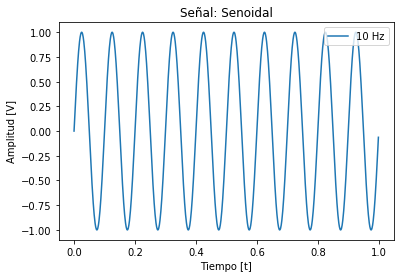

In [49]:
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

tt, signal = ins.generador_senoidal (fs, f0, N, a0, p0)
plt.plot(tt,signal, label='10 Hz')
plt.legend(loc='upper right')
plt.xlabel('Tiempo [t]')
plt.ylabel('Amplitud [V]')
plt.title("Señal: Senoidal")

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En principio sí, debido a que hay 10 ciclos en 1 segundo.
   
</div>

Text(0.5, 1.0, 'Señal: Senoidal')

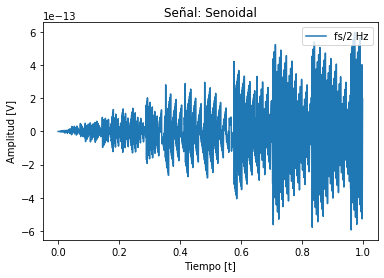

In [50]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt, signal = ins.generador_senoidal (fs, f0, N, a0, p0)
plt.plot(tt,signal, label='fs/2 Hz')
plt.legend(loc='upper right')
plt.xlabel('Tiempo [t]')
plt.ylabel('Amplitud [V]')
plt.title("Señal: Senoidal")

Text(0.5, 1.0, 'Señal: Senoidal')

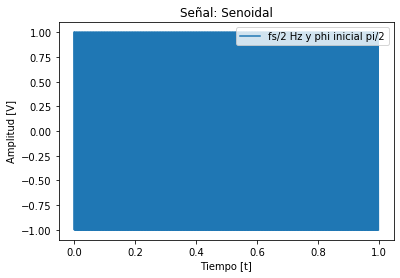

In [51]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt, signal = ins.generador_senoidal (fs, f0, N, a0, p0)
plt.plot(tt,signal, label='fs/2 Hz y phi inicial pi/2')
plt.legend(loc='upper right')
plt.xlabel('Tiempo [t]')
plt.ylabel('Amplitud [V]')
plt.title("Señal: Senoidal")

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al estar en el límite de la condición de Nyquist en el primer caso siempre muestreamos los ceros de la función y lo que vemos es un error de aproximación del algoritmo que grafica y para el segundo caso vemos que sólo estamos muestreando los máximos y los mínimos (+1 y -1)
</div>

Text(0.5, 1.0, 'Señal: Senoidal')

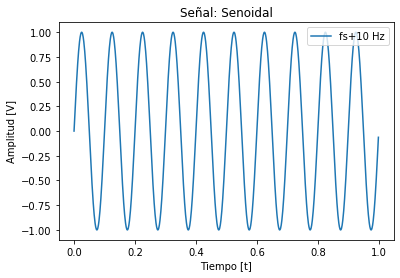

In [52]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt, signal = ins.generador_senoidal (fs, f0, N, a0, p0)
plt.plot(tt,signal, label='fs+10 Hz')
plt.legend(loc='upper right')
plt.xlabel('Tiempo [t]')
plt.ylabel('Amplitud [V]')
plt.title("Señal: Senoidal")

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible, parece que esta señal también fuera de 10 Hz
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Mediante un filtro anti-alias.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [53]:
import timeit

the_start = timeit.timeit()
print("hello")
the_end = timeit.timeit()
print(the_start - the_end)


hello
0.0045462079999651905


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [54]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['--'], 
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   ['']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,--
16,
32,
64,
128,
256,
512,
1024,
2048,


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [55]:
#######################################
# Tu simulación que genere resultados #
N  = 1000 # muestras
fs = 1000 # Hz

a0 = 1 # Volts
p0 = 0 # radianes

f0 = fs/4
f1 = f0 + 0.01
f2 = f0 + 0.25
f3 = f0 + 0.5
   
"Generador de señal"
tt0, signal0 = ins.generador_senoidal (fs, f0, N, a0, p0)
tt1, signal1 = ins.generador_senoidal (fs, f1, N, a0, p0)
tt2, signal2 = ins.generador_senoidal (fs, f2, N, a0, p0)
tt3, signal3 = ins.generador_senoidal (fs, f3, N, a0, p0)

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)
modulo1, fase1, ww1 = ins.analizador_espectro(signal1, fs)
modulo2, fase2, ww2 = ins.analizador_espectro(signal2, fs)
modulo3, fase3, ww3 = ins.analizador_espectro(signal3, fs)

f0_0 = 20*np.log10(modulo0[int(f0)])
f0_1 = 20*np.log10(modulo1[int(f0)])
f0_2 = 20*np.log10(modulo2[int(f0)])
f0_3 = 20*np.log10(modulo3[int(f0)])

fady_0 = 20*np.log10(modulo0[int(f0+1)])
fady_1 = 20*np.log10(modulo1[int(f0+1)])
fady_2 = 20*np.log10(modulo2[int(f0+1)])
fady_3 = 20*np.log10(modulo3[int(f0+1)])

sum_resto_frecuencias0 = ins.sumatoria_modulo_cuadrado(modulo0) - modulo0[int(f0)]
sum_resto_frecuencias1 = ins.sumatoria_modulo_cuadrado(modulo1) - modulo1[int(f0)]
sum_resto_frecuencias2 = ins.sumatoria_modulo_cuadrado(modulo2) - modulo2[int(f0)]
sum_resto_frecuencias3 = ins.sumatoria_modulo_cuadrado(modulo3) - modulo3[int(f0)]
#######################################

tus_resultados = [ ['$ \lvert X(f_0) \lvert$ dB', '$ \lvert X(f_0+1) \lvert$ dB', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [f0_0, fady_0, sum_resto_frecuencias0], # <-- acá debería haber numeritos :)
                  [f0_1, fady_1, sum_resto_frecuencias1], # <-- acá debería haber numeritos :)
                  [f0_2, fady_2, sum_resto_frecuencias2], # <-- acá debería haber numeritos :)
                  [f0_3, fady_3, sum_resto_frecuencias3]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$ dB,$ \lvert X(f_0+1) \lvert$ dB,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1.92865e-15,-273.879,2.22045e-16
$f_S/4+0.01$,-0.00144593,-39.9124,0.000162516
$f_S/4+0.25$,-0.918921,-10.4341,0.0993887
$f_S/4+0.5$,-3.92243,-3.92234,0.363382


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

(200, 300)

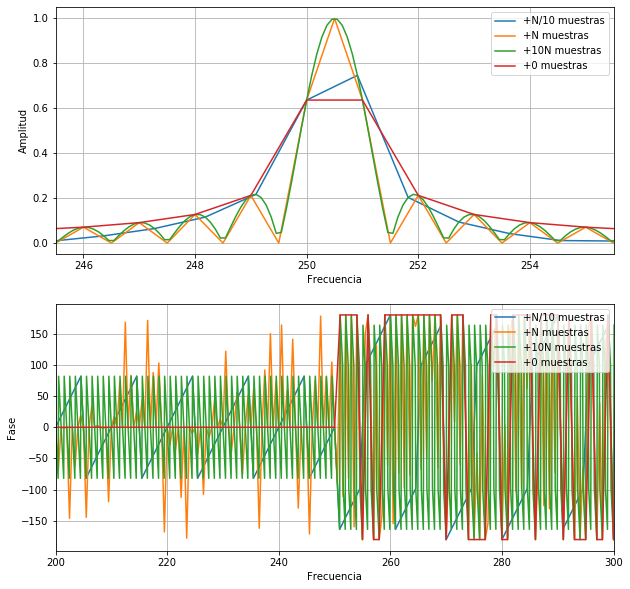

In [85]:
N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs/4 + 0.5# Hz


tt0, signal0 = ins.generador_senoidal (fs, f0, N, a0, p0)
tt1, signal1 = ins.generador_senoidal (fs, f0, N, a0, p0)
tt2, signal2 = ins.generador_senoidal (fs, f0, N, a0, p0)
tt3, signal3 = ins.generador_senoidal (fs, f0, N, a0, p0)

extra_zeros = int(N/10)
signal0 = np.concatenate((signal0, np.zeros(extra_zeros)),axis=0)
signal0 *= 1.1 #Mantengo la energía total a pesar del zero padding
tt0 = np.linspace(0, (N-1)*Ts, N+extra_zeros)

extra_zeros = N
signal1 = np.concatenate((signal1, np.zeros(extra_zeros)),axis=0)
signal1 *= 2 #Mantengo la energía total a pesar del zero padding
tt1 = np.linspace(0, (N-1)*Ts, N+extra_zeros)

extra_zeros = 10*N
signal2 = np.concatenate((signal2, np.zeros(extra_zeros)),axis=0)
signal2 *= 11 #Mantengo la energía total a pesar del zero padding
tt2 = np.linspace(0, (N-1)*Ts, N+extra_zeros)


plt.figure("Analizador espectro", figsize=(10,10))

plt.title("Modulo y fase señal")

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)
modulo1, fase1, ww1 = ins.analizador_espectro(signal1, fs)
modulo2, fase2, ww2 = ins.analizador_espectro(signal2, fs)
modulo3, fase3, ww3 = ins.analizador_espectro(signal3, fs)

plt.subplot(2,1,1)
plt.plot(ww0, modulo0, label='+N/10 muestras')
plt.plot(ww1, modulo1, label='+N muestras')
plt.plot(ww2, modulo2, label='+10N muestras')
plt.plot(ww3, modulo3, label='+0 muestras')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(245.5,255.5)


plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='+N/10 muestras')
plt.plot(ww1, fase1, label='+N muestras')
plt.plot(ww2, fase2, label='+10N muestras')
plt.plot(ww3, fase3, label='+0 muestras')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")
plt.xlim(200,300)

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La resolución espectral varió debido al aumento de muestras, de hecho se puede apreciar que al aumentar el zero padding cada vez se nota mejor la frecuencia central (A costa de deformar la señal con una sinc)
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al aumentar la cantidad de muestras, se suavizó el espectro pero al mismo tiempo se perdió energía de la señal (Se requirió aumentar la amplitud de la misma para poder compararlas). También se observa una deformación en la señal producto de la función interpolante del zero padding -sinc- (Al agregar ceros en la señal, es como tener la señal multiplicada por un pulso rectangular, lo que en frecuencia condice con la sinc)
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [101]:
#######################################
    # Tu simulación que genere resultados #
e0 = ((ww0[np.argmax(modulo0)] - f0) / f0) * 100
e1 = ((ww1[np.argmax(modulo1)] - f0) / f0) * 100
e2 = ((ww2[np.argmax(modulo2)] - f0) / f0) * 100
e3 = ((ww3[np.argmax(modulo3)] - f0) / f0) * 100
#######################################

tus_resultados = [e3, # <-- acá debería haber numeritos :)
                  e0, # <-- acá debería haber numeritos :)
                  e1, # <-- acá debería haber numeritos :)
                  e2 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,0.199601
$N/10$,0.163310
$N$,0.000000
$10N$,0.018146


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,1,9
,,,
simulación,1,1,9


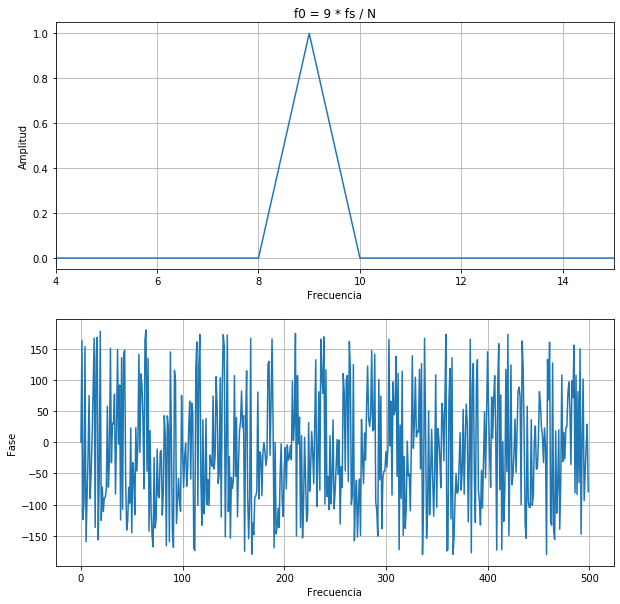

In [145]:
#######################################
# Tu simulación que genere resultados #
N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

a0 = 1     # Volts - Energia normalizada (1)
p0 = 0     # radianes
f0 = 9*fs/N

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)
modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("f0 = 9 * fs / N")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(4,15)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")

Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

maxE = ww0[np.argmax(modulo0)]
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1', '1', '9'], # <-- completar acá
                  ['', '', ''], 
                  [Ps, Pf0, maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.111111,0.0123457,9
,,,
simulación,0.111111,0.0123456,8


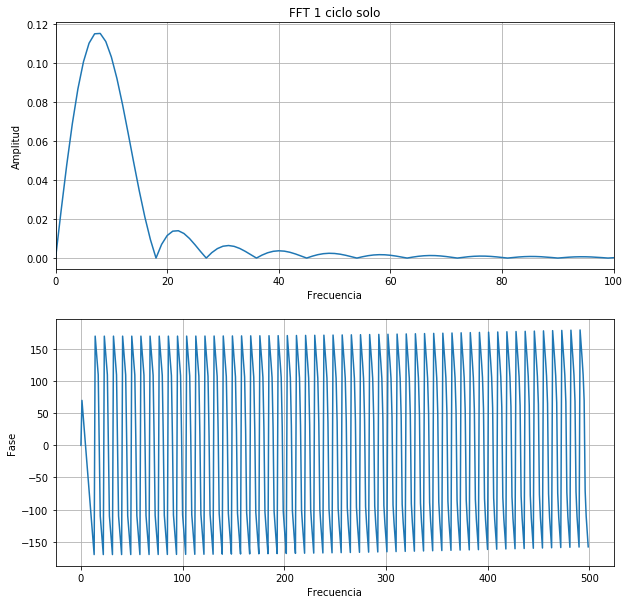

In [147]:
#######################################
# Tu simulación que genere resultados #
from Modulos import instrumentos as ins

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)

signal0 = np.concatenate((signal0[0:int(fs/f0)], np.zeros(N-int(fs/f0))),axis=0)
modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 1 ciclo solo")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,100)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")

Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

maxE = ww0[np.argmax(modulo0)]
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [1/9, 1/81, 9], # <-- completar acá
                  ['', '', ''], 
                  [Ps, Pf0, maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Por un lado cambió la energía total de la señal, eso se puede ver en la tabla anterior (4b)  que la energía total ahora tiene un valor de 0.111... Es decír 9 veces menos que en el caso anterior, esto es debido a la concatenación de ceros porque la señal ahora tiene un sólo ciclo en vez de los 9 ciclos que tenía previamente. También se puede apreciar el efecto del leakage -producto de la ventana rectangular implícita por hacer zero padding- que movió la frecuencia central f0 a 8Hz cuando la señal en realidad tiene una frecuencia de 9Hz.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.111111,0.0123457,9
,,,
simulación,0.111111,0.0123456,8


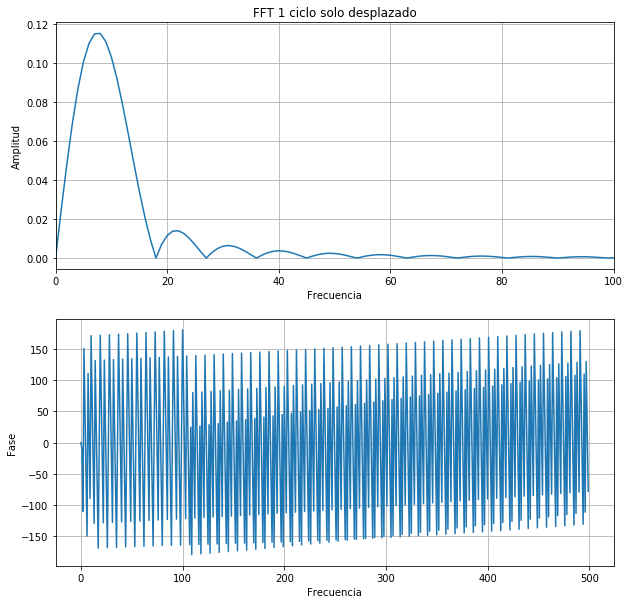

In [120]:
#######################################
# Tu simulación que genere resultados #
from Modulos import instrumentos as ins

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)

signal0 = np.concatenate((np.zeros(2*int(fs/f0)), signal0[0:int(fs/f0)]))
signal0 = np.concatenate((signal0, np.zeros(N-3*int(fs/f0))),axis=0)
modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 1 ciclo solo desplazado")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,100)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")

Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

maxE = ww0[np.argmax(modulo0)]
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [1/9, 1/81, 9], # <-- completar acá
                  ['', '', ''], 
                  [Ps, Pf0, maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En contraste con el punto 4b) podemos ver que los espectros son exactamente iguales, y las tablas nos indican que la energía total (0.111...) y la energía en f(9Hz) = 0.012345 permanecen constantes a pesar de haberle generado una demora a la señal. Lógicamente lo que varía es la fase, debido a que por identidad de Fourier un desplazamiento en tiempo equivale a un corrimiento en fase al transformar.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.236111,0.012 en 9Hz y 0.016 en 8Hz,8
,,,
simulación,0.236111,0.016 en 9Hz y 0.056 en 8Hz,8


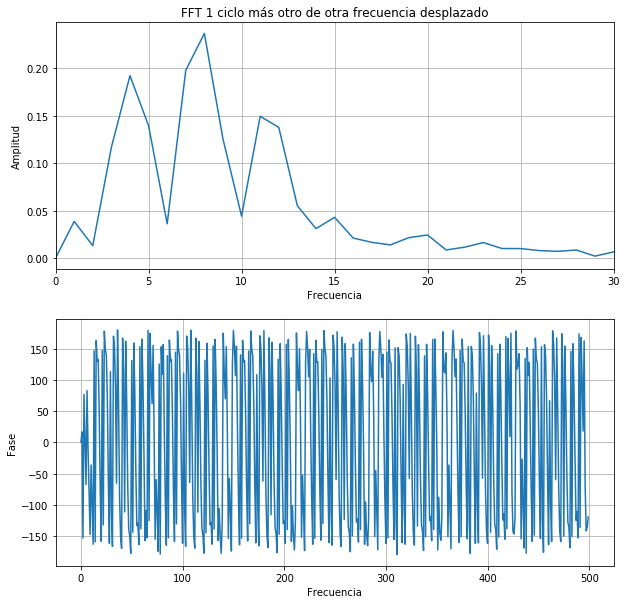

In [137]:
#######################################
# Tu simulación que genere resultados #
N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts
f1 = 8*fs/N

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)
tt1, signal1 = ins.generador_senoidal(fs, f1, N, a0, p0)

signal3 = np.concatenate((signal0[0:int(fs/f0)], np.zeros(N-int(fs/f0))),axis=0)   
signal4 = np.concatenate((np.zeros(2*int(fs/f1)), signal1[0:int(fs/f1)]))
signal4 = np.concatenate((signal4, np.zeros(N - 3*int(fs/f1))),axis=0)

signal0 = signal3 + signal4

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 1 ciclo más otro de otra frecuencia desplazado")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,30)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")

Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

Pf1 = np.abs(modulo0[int(f1)])
Pf1 = Pf1 * Pf1

maxE = ww0[np.argmax(modulo0)]

#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [1/9+1/8, str(round(1/81,3)) + " en 9Hz y " + str(round(1/64,3)) + " en 8Hz", "8"], # <-- completar acá
                  ['', '', ''], 
                  [Ps, str(round(Pf0,3)) + " en 9Hz y " + str(round(Pf1,3)) + " en 8Hz", maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En principio no podría localizar las componentes a tal punto que las predicciones que se esperaban (ver picos en 8Hz y 9Hz), en vez de eso podemos obtener el pico máximo esperado (8Hz) pero el siguiente que esperábamos ver (9Hz) termina siendo opacado por el pico en 4Hz dando a entender que existe una componente en esa frecuencia. Se me ocurre barrer la señal con distintos filtros pasabanda acordes a la resolución espectral que quiera obtener e ir viendo su espectro para obtener su descomposición en cada una de las componentes de Fourier.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.236111,0.012 en 9Hz y 0.016 en 8Hz,8
,,,
simulación,0.236111,0.035 en 9Hz y 0.056 en 8Hz,8


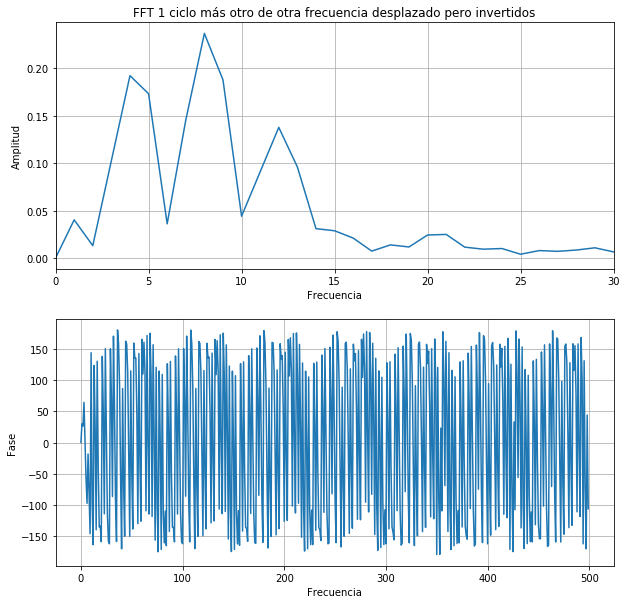

In [139]:
#######################################
# Tu simulación que genere resultados #
N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts
f1 = 8*fs/N

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)
tt1, signal1 = ins.generador_senoidal(fs, f1, N, a0, p0)

signal3 = np.concatenate((signal1[0:int(fs/f1)], np.zeros(N-int(fs/f1))),axis=0)
  
signal4 = np.concatenate((np.zeros(2*int(fs/f1)), signal0[0:int(fs/f0)]))
signal4 = np.concatenate((signal4, np.zeros(N - 2*int(fs/f1) - int(fs/f0))),axis=0)

signal0 = signal3 + signal4

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 1 ciclo más otro de otra frecuencia desplazado pero invertidos")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,30)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")

Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

Pf1 = np.abs(modulo0[int(f1)])
Pf1 = Pf1 * Pf1

maxE = ww0[np.argmax(modulo0)]
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [1/9+1/8, str(round(1/81,3)) + " en 9Hz y " + str(round(1/64,3)) + " en 8Hz", "8"], # <-- completar acá
                  ['', '', ''], 
                  [Ps, str(round(Pf0,3)) + " en 9Hz y " + str(round(Pf1,3)) + " en 8Hz", maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El espectro no parece haber cambiado -al menos su módulo-. Teniendo sólo el espectro no se podría identificar cuál señal sucedió anterior a la otra. En este caso el análisis de Fourier no parecería tener utilidad para identificar el orden de las señales ya que el cambio debe notarse en la fase y no es algo que se pueda aprecia debido al ruido de fase.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.333333,0.111111,9
,,,
simulación,0.333333,0.111111,9


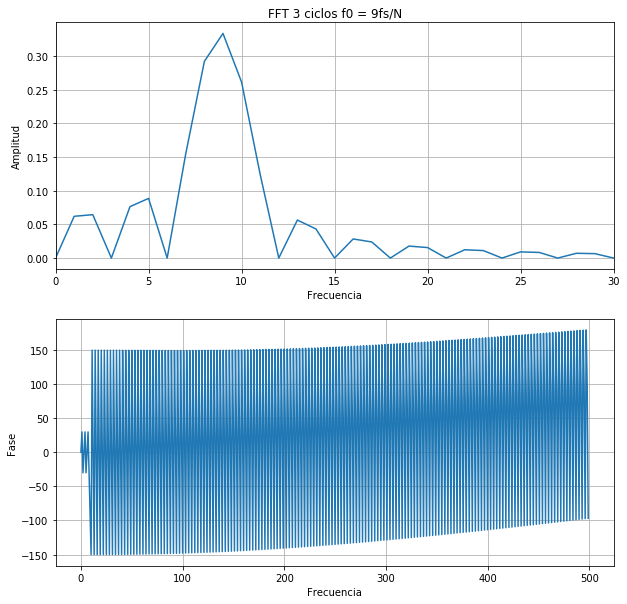

In [114]:
#######################################
# Tu simulación que genere resultados #
from Modulos import instrumentos as ins

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)

signal0 = np.concatenate((signal0[0:(3*int(fs/f0))], np.zeros(N-3*int(fs/f0))),axis=0)

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 3 ciclos f0 = 9fs/N")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,30)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")

Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

maxE = ww0[np.argmax(modulo0)]
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [1/3, 1/9, 9], # <-- completar acá
                  ['', '', ''], 
                  [Ps, Pf0, maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía en f0 para este caso es 0.11.. por lo que tiene 9 veces menos de energía en comparación de los 9 ciclos -Señal completa de energía normalizada en 1 tabla ejercicio 4a)- y 9 veces más de energía en comparación a la de un sólo ciclo la cual tiene energía total de 0.0123... (Tabla ejercicio 4b)
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,3.88889,1.2963,9
,,,
simulación,3.88888,0.999982,9


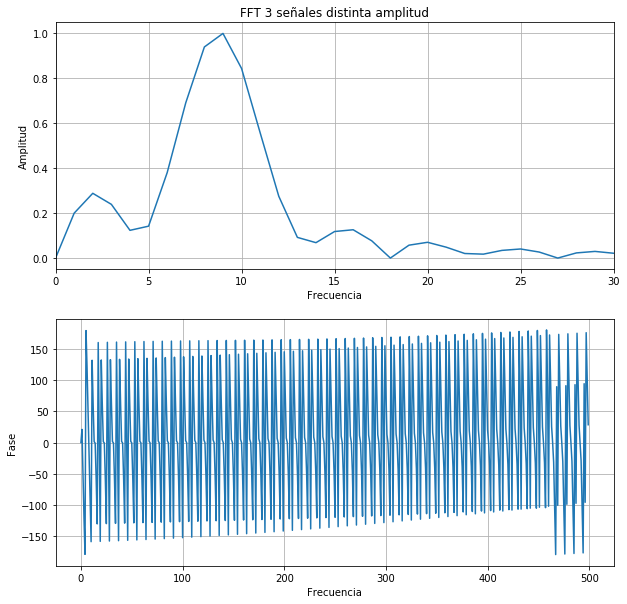

In [174]:
#######################################
# Tu simulación que genere resultados #
from Modulos import instrumentos as ins

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts
a1 = 5
a2 = 3

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)
tt1, signal1 = ins.generador_senoidal(fs, f0, N, a1, p0)
tt2, signal2 = ins.generador_senoidal(fs, f0, N, a2, p0)

signal0 = np.concatenate((signal0[0:int(fs/f0)], np.zeros(N-int(fs/f0))),axis=0)

signal1 = np.concatenate((np.zeros(int(fs/f0)), signal1[0:int(fs/f0)]))
signal1 = np.concatenate((signal1, np.zeros(N-2*int(fs/f0))),axis=0)

signal2 = np.concatenate((np.zeros(2*int(fs/f0)), signal2[0:int(fs/f0)]))
signal2 = np.concatenate((signal2, np.zeros(N-3*int(fs/f0))),axis=0)

signal0 = signal0 + signal1 + signal2

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 3 señales distinta amplitud")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,30)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")
Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

maxE = ww0[np.argmax(modulo0)]
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [1/9 + 25/9 + 9/9, (1/9 + 25/9 + 9/9)/3, 9], # <-- completar acá
                  ['', '', ''], 
                  [Ps, Pf0, maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía en f0 ahora es de 1, en comparación con el ejercicio  4f) tiene 9 veces más de energía (0.111...) Lo interesante de este punto es la diferencia que ocurre con la predicción propuesta!
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,11.6667,11.6667,9
,,,
simulación,11.6666,8.9977,9


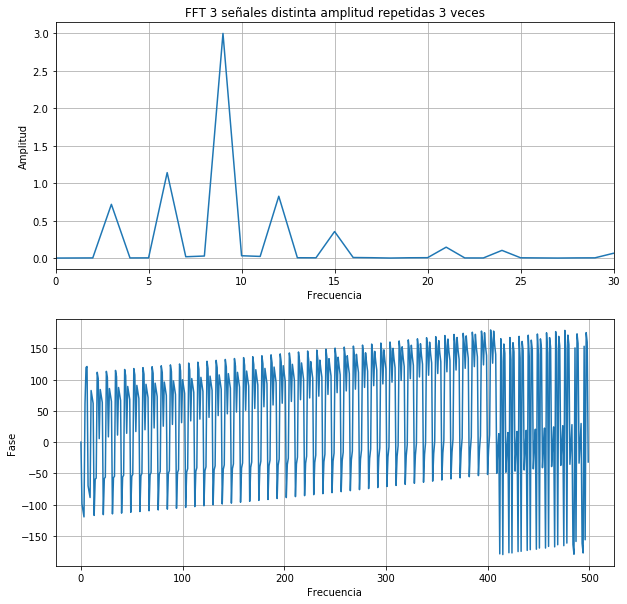

In [178]:
#######################################
# Tu simulación que genere resultados #
from Modulos import instrumentos as ins

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts
a1 = 5
a2 = 3

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)
tt1, signal1 = ins.generador_senoidal(fs, f0, N, a1, p0)
tt2, signal2 = ins.generador_senoidal(fs, f0, N, a2, p0)

signal0 = np.concatenate((signal0[0:int(fs/f0)], np.zeros(N-int(fs/f0))),axis=0)

signal1 = np.concatenate((np.zeros(int(fs/f0)), signal1[0:int(fs/f0)]))
signal1 = np.concatenate((signal1, np.zeros(N-2*int(fs/f0))),axis=0)

signal2 = np.concatenate((np.zeros(2*int(fs/f0)), signal2[0:int(fs/f0)]))
signal2 = np.concatenate((signal2, np.zeros(N-3*int(fs/f0))),axis=0)

signal0 = signal0 + signal1 + signal2
signal0 = signal0[0:3*int(fs/f0)]
    
signal0 = np.concatenate((signal0, signal0, signal0, np.zeros(1
                                                              )), axis=0)

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 3 señales distinta amplitud repetidas 3 veces")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,30)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")

Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

maxE = ww0[np.argmax(modulo0)]

#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [(1/9 + 25/9 + 1)*3, (1/9 + 25/9 + 1)*3, 9], # <-- completar acá
                  ['', '', ''], 
                  [Ps, Pf0, maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Tiene 9 veces más de energía que en el ejercicio anterior (En este ejercicio la energía en f0 es 9, mientras que en el ejercicio 4.g es de 1). En el ejercicio 4.a se obtuvo como resultado que la energía en f0 era 1 debido a que toda la energía era prevista por un tono puro en f0 y su energía estaba normalizada. Lo interesante es que la energía en f0 para este caso debería ser igual que la energía total de la señal debido a que la frecuencia no cambia en ningún momento, pero aún así vemos que ocurre efecto leakage debido a los cambios de amplitud! Algo que refuta la idea central de que el leakage está asociado a los cambios de frecuencia y puede estar asociado a los cambios de amplitud!
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.222222,0,9
,,,
simulación,0.222222,4.87385e-07,5


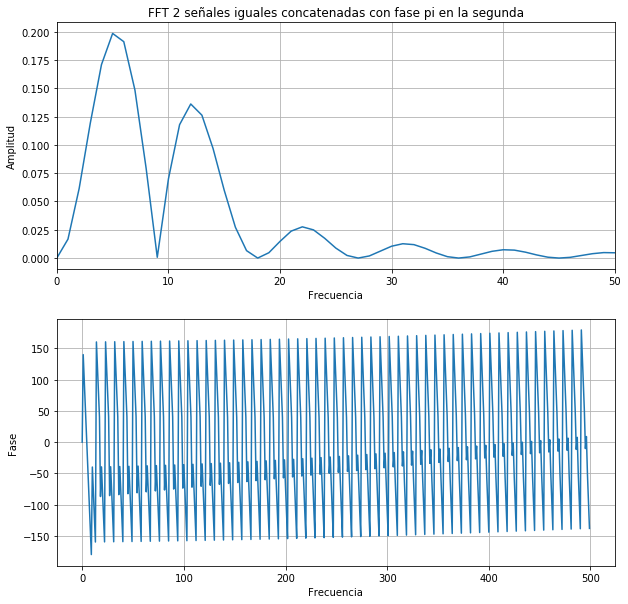

In [117]:
#######################################
# Tu simulación que genere resultados #
from Modulos import instrumentos as ins

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N  = 1000 # muestras
fs = 1000 # Hz
Ts = 1/fs

f0 = 9*fs/N
p0 = 0     # radianes
a0 = 1      # Volts
p1 = np.pi

tt0, signal0 = ins.generador_senoidal(fs, f0, N, a0, p0)
tt1, signal1 = ins.generador_senoidal(fs, f0, N, a0, p1)


signal0 = np.concatenate((signal0[0:int(fs/f0)],signal1[0:int(fs/f0)],np.zeros(N-2*int(fs/f0))),axis=0)

modulo0, fase0, ww0 = ins.analizador_espectro(signal0, fs)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("FFT 2 señales iguales concatenadas con fase pi en la segunda")
plt.plot(ww0, modulo0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.xlim(0,50)
plt.subplot(2,1,2)
plt.plot(ww0, fase0, label='fs')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Fase")
Ps = ins.sumatoria_modulo_cuadrado(modulo0[0:int(fs/2)])

Pf0 = np.abs(modulo0[int(f0)])
Pf0 = Pf0 * Pf0

maxE = ww0[np.argmax(modulo0)]
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [2/9, 0, '9'], # <-- completar acá
                  ['', '', ''], 
                  [Ps, Pf0, maxE]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No tiene componente en f0, se anulan debido a las fases de las señales. De todas formas se observa en el gráfico del módulo de este ejercicio que aparecen componentes en otras frecuencias inesperadas, por ejemplo como se calculó la frecuencia que contiene el máximo de amplitud para este caso es 5Hz.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b>
    La estimación de la energía de toda señal mediante Fourier es sumamente fiable ya que en todos los ejercicios planteados la predicción de la energía coincidió exactamente a la energía calculada de la señal. (Error 0% para los casos planteados).<br><br>
    El contenido espectral en ciertos casos se ve abruptamente alterado, especialmente en el ejercicio 4h donde la señal mantiene frecuencia constante en todo momento y aún así se observaron componentes en distintas frecuencias distintas a la original, o en los ejercicios 4d y 4e donde hay más de una frecuencia (8Hz y 9Hz) se pudieron apreciar componentes espectrales en frecuencias de 4Hz o 5Hz.<br><br>
    La determinación de la energía en un determinado ancho de banda tampoco es fiable como el caso del contenido espectral, ya que en el caso de que exista más de un tono en la señal se empieza a ver cómo afectan entre sí esas componentes. Por ejemplo, el caso de los ejercicios 4d y 4e donde se esperaba encontrar componentes sólo en 8Hz y 9Hz y que la energía en esas componentes sea la prevista por cada ciclo independientemente del otro (1 ciclo de 8Hz y 1 ciclo de 9Hz), prediciendo energías de 1/8 -0.012- y 1/9 -0.016- en 8Hz y 9Hz respectivamente se obtuvieron para el ejercicio 4d energ[ias de 0.016 y 0.056 para 8Hz y 9Hz respectivamente, y no sólo eso, sino que en el ejercicio 4e se invirtió el orden de las señales en el tiempo, algo que en principio no debería cambiar el módulo del espectro y aún así se obtuvo energías de 0.035 y 0.056 para 8Hz y 9Hz respectivamente, notando una variación en la energía en la componente de 8Hz.<br><br>
    En cuanto a la localización temporal por lo expuesto en el último párrafo ya vemos que es un efecto que no podríamos identificar, esto queda expuesto también en los ejercicios 4b y 4c donde la diferencia es un desplazamiento temporal, el cual afectó sólo a la fase, y en el caso más extremo, el ejercicio 4i donde se toma un ciclo de la señal y se le agrega otro ciclo defasado 180 grados y tiene por resultado un espectro que nos hace pensar que la señal podría estar compuesta por señales de 5Hz, 12hz entre otras, pero en ningún caso para nuestra f0 = 9Hz.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [67]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [68]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [69]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [70]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>